# Problema 1 - Análise de Impacto de Variáveis no Faturamento

Nesse notebook você encontrará todo o desenvolvimento de uma análise avançada para compreender como as variáveis, determinada pela área de negócio, diretores e gestores, impactam a abertura de uma campanha. No fim, teremos um relatório com esses pontos.

## 0.0 Pacotes e Bibliotecas

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sbn

import matplotlib.pyplot as plt


## 1.0 Carregamento dos Dados

In [2]:
# Carregamento dos Dados
df1 = pd.read_csv('../BaseDados/bank-full.csv', delimiter=';')

# Validação
print(f'Quantidade de Linhas: {df1.shape[0]}; Quantidade de Colunas: {df1.shape[1]}.')

# Amostra dos Dados
df1.sample(5)

Quantidade de Linhas: 45211; Quantidade de Colunas: 17.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15414,30,management,married,tertiary,no,107,yes,yes,cellular,18,jul,263,1,-1,0,unknown,no
26946,55,retired,married,primary,no,3876,no,no,cellular,21,nov,54,1,-1,0,unknown,no
17128,40,management,divorced,tertiary,no,96,yes,no,cellular,25,jul,188,14,-1,0,unknown,no
5744,34,services,married,secondary,no,-694,yes,no,unknown,26,may,62,1,-1,0,unknown,no
3403,42,management,single,tertiary,no,1146,yes,no,unknown,15,may,98,2,-1,0,unknown,no


### 1.1 Dicionário de Dados

Logo abaixo, temos o dicionário das variáveis.

| Variable Name | Description |
|---------------|-------------------|
|     age       |   Idade do Cliente| 
|     job       | 	Tipo do trabalho. Temos as seguintes categorias: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'.|
|    marital    |   Status Matrimonia. Categorias: 'divorced','married','single','unknown'. |
|   education   |   Nível educacional do cliente. Categorias: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'. |
|    default    |   Essa variável nos diz se o cliente é inadimplente. Categorias: 'yes', 'no'. |
|    balance    |   Saldo médio anual do cliente na conta, cuja unidade é em euros. |
|    housing    |   Possui financiamento imobiliário? Categorias: 'yes', 'no'.|
|    loan       |   Possui empréstimo pessoal? Categorias: 'yes', 'no'. |
|    contact    |   Meio de contato utilizado para falar com o cliente. Categorias: 'celular', 'telephone'.|
|  day_of_week  |   Último Dia da semana em que o contato foi feito. |
|     month     |   Último mês de contato com o cliente. |
|   duration    |   Duração da ligação, em segundos, da última ligação. |
|   campaign    |   Número de contatos realizados com o cliente durante a campanha atual. |
|    pdays      |   Número de dias que se passaram desde o último contato com o cliente em uma campanha anterior. Se a variável -1, então o cliente não foi contatado. |
|   previous    |   Número de contatos realizados com o clientes antes dessa campanha. |
|   poutcome    |   Resultado da campanha anterior de marketing. |
|      y        |   Variável alvo para saber se o cliente assinou ou não termo de depósito. Categorias: 'failure','nonexistent','success'. |

## 2.0 Análise Exploratória dos Dados

Para o nosso objetivo, vamos primeiramente, verificar os tipos dos dados.

In [3]:
# Cópia dos Dados
df2 = df1.copy()

# Renomeando a variável
df2 = df2.rename(columns={'y':'deposit_term_assigned'}).copy()

# Validação dos Dados
print(f'Quantidade de Linhas: {df2.shape[0]}; Quantidade de Colunas: {df1.shape[1]}.')

Quantidade de Linhas: 45211; Quantidade de Colunas: 17.


### 2.1 Tipo dos Dados

O objetivo aqui é verificar os tipos dos dados e, ver, se há necessidade de mudanças.

In [4]:
# Obtendo as informações dos dados
df2.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    45211 non-null  int64 
 1   job                    45211 non-null  object
 2   marital                45211 non-null  object
 3   education              45211 non-null  object
 4   default                45211 non-null  object
 5   balance                45211 non-null  int64 
 6   housing                45211 non-null  object
 7   loan                   45211 non-null  object
 8   contact                45211 non-null  object
 9   day                    45211 non-null  int64 
 10  month                  45211 non-null  object
 11  duration               45211 non-null  int64 
 12  campaign               45211 non-null  int64 
 13  pdays                  45211 non-null  int64 
 14  previous               45211 non-null  int64 
 15  poutcome           

Resumidamente, não vemos a presença de dados nulos, o que já é uma boa coisa. Claramente, no dia a dia, isso é raro de acontecer e, uma tratamento é realmente esperado. Outro ponto aqui, que também é raro, são os tipos dos dados. Todos estão fazendo sentido e são, de fato, esperado de acordo com o dicionário de dados.

### 2.2 Análise Geral dos Dados

Para que possamos, de fato, iniciar toda uma análise estatística, modelagem e outros pontos, precisamos, primeiramente, ver se os dados fazem sentido, isto é, se as relações dadas estão de acordo com o negócio. Isso é importante, pois, às vezes, ocorre de realizarmos coleta de dados indevidas e, por falta de uma etapa de checagem, perdemos toda uma análise.

**Variáveis Categóricas**

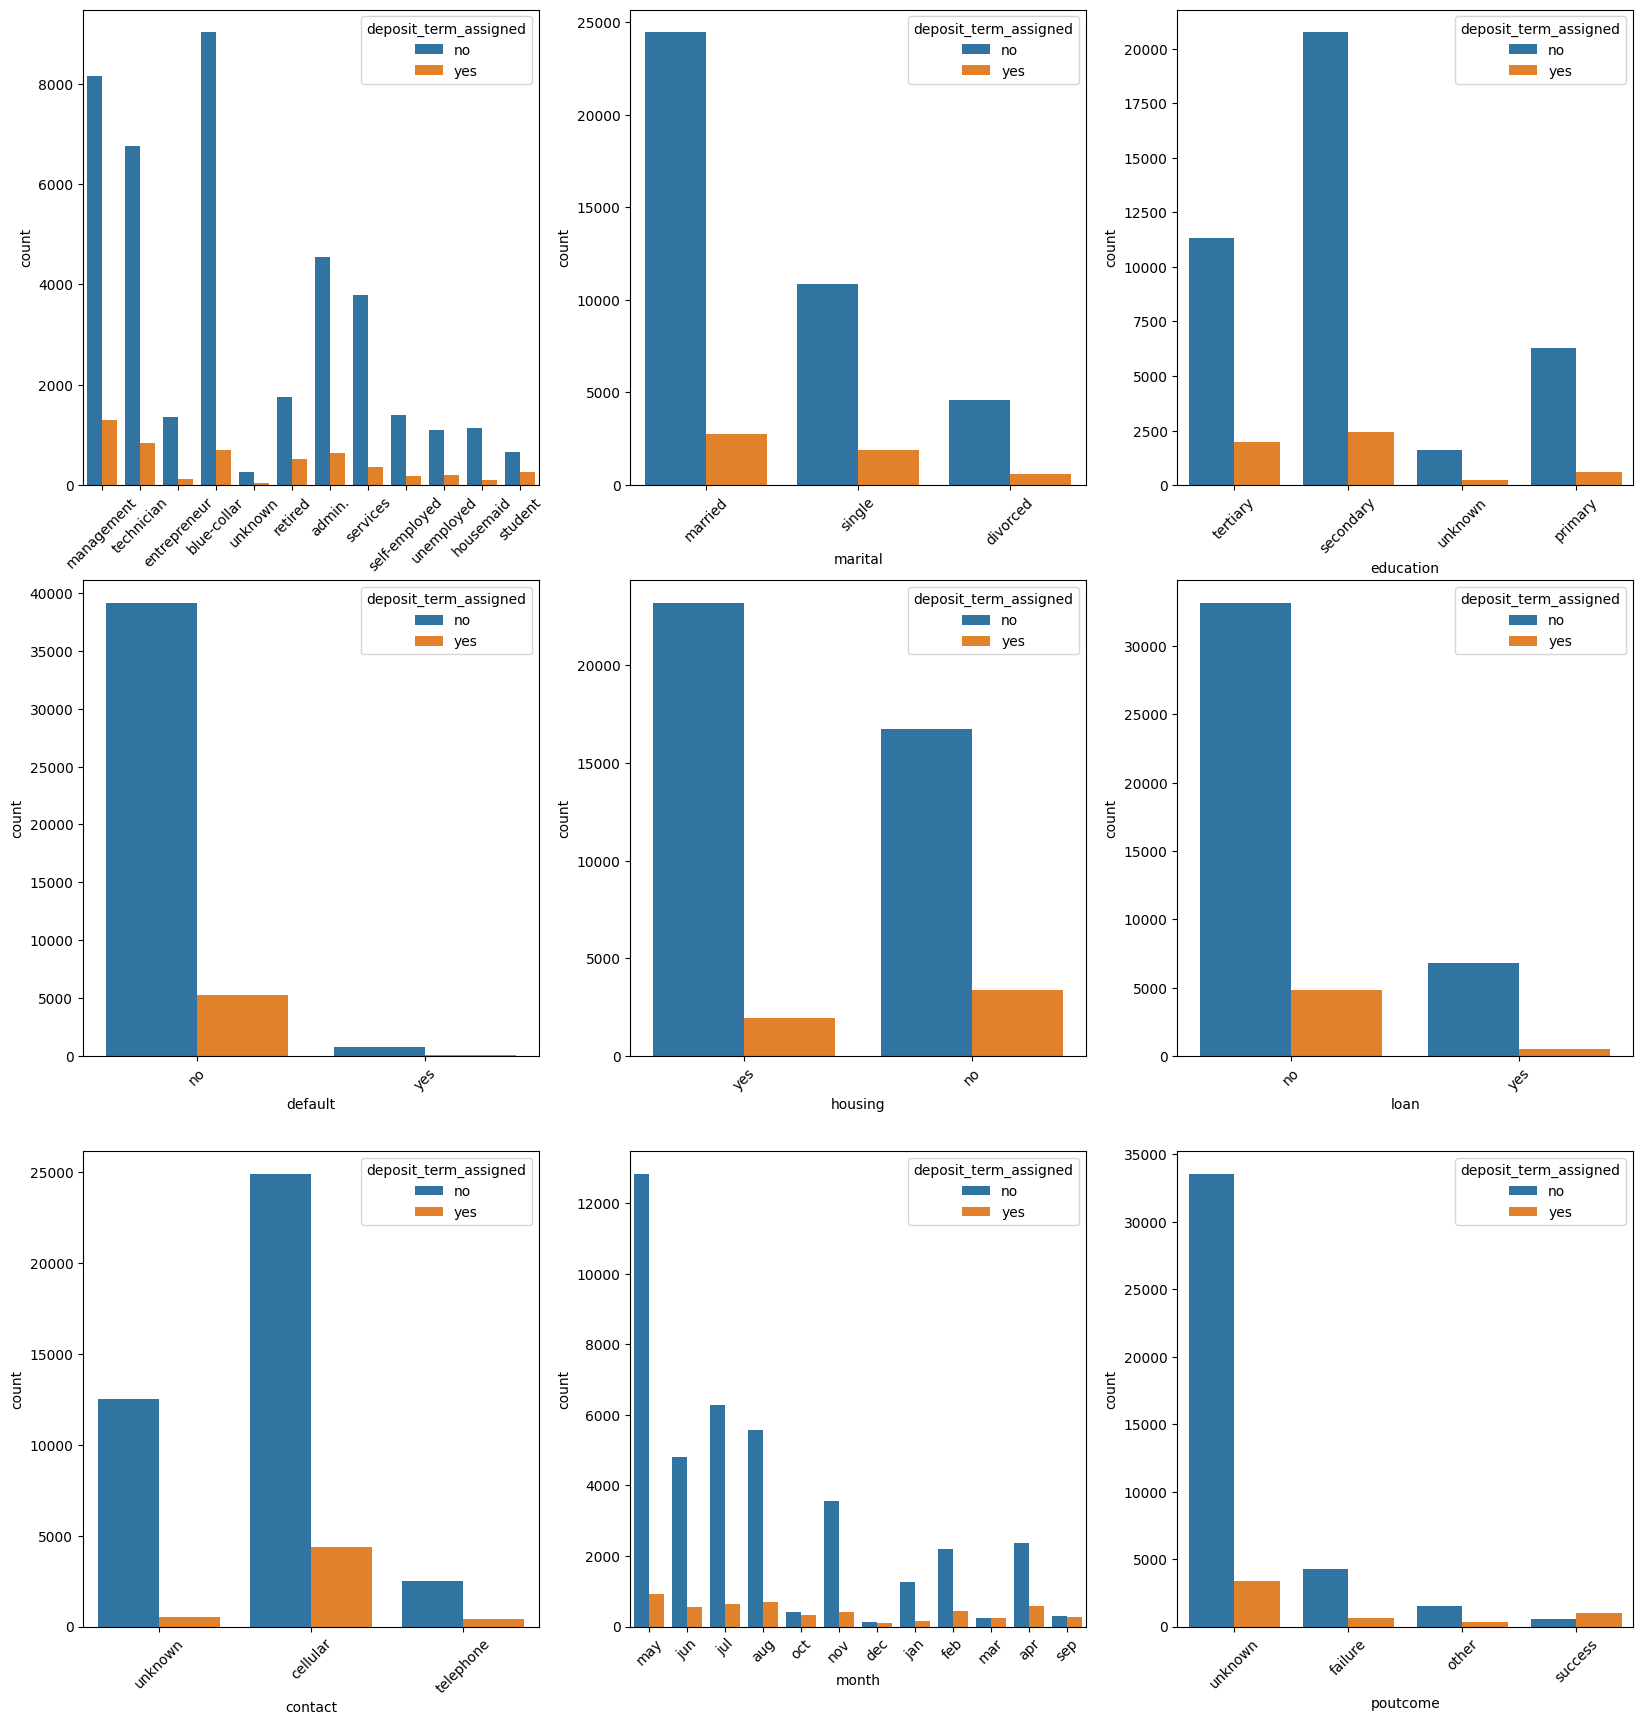

In [5]:
# Definindo a imagem e seus quadrantes e o tamanho
fig, axs = plt.subplots(3, 3, figsize=(20,21));


# Contagem de trabalhos versus por cliente que aceitaram o termo
sbn.countplot(data=df2, x='job', hue='deposit_term_assigned', ax=axs[0][0]);
axs[0][0].tick_params(axis='x', rotation=45);

# Contagem de status matrimonial por clientes que aceitaram o termo
sbn.countplot(data=df2, x='marital', hue='deposit_term_assigned', ax=axs[0][1]);
axs[0][1].tick_params(axis='x', rotation=45);

# Contagem de nivel educacional por aceitação do termo de depósito bancário
sbn.countplot(data=df2, x='education', hue='deposit_term_assigned', ax=axs[0][2]);
axs[0][2].tick_params(axis='x', rotation=45);

# Contagem de nivel educacional por aceitação do termo de depósito bancário
sbn.countplot(data=df2, x='default', hue='deposit_term_assigned', ax=axs[1][0]);
axs[1][0].tick_params(axis='x', rotation=45);

# Contagem de financiamento imobiliário por aceitação de depósitos bancário
sbn.countplot(data=df2, x='housing', hue='deposit_term_assigned', ax=axs[1][1]);
axs[1][1].tick_params(axis='x', rotation=45);

# Contagem de empréstimo pessoal por aceitação de depósitos bancário
sbn.countplot(data=df2, x='loan', hue='deposit_term_assigned', ax=axs[1][2]);
axs[1][2].tick_params(axis='x', rotation=45);

# Contagem de meio de contato por aceitação de depósitos bancário
sbn.countplot(data=df2, x='contact', hue='deposit_term_assigned', ax=axs[2][0]);
axs[2][0].tick_params(axis='x', rotation=45);

# Contagem do último mês de contato por aceitação de depósito bancário
sbn.countplot(data=df2, x='month', hue='deposit_term_assigned', ax=axs[2][1]);
axs[2][1].tick_params(axis='x', rotation=45);

# Contagem dos resultados da campanho por aceitação de depósito bancário
sbn.countplot(data=df2, x='poutcome', hue='deposit_term_assigned', ax=axs[2][2]);
axs[2][2].tick_params(axis='x', rotation=45);

**Variáveis Numéricas**

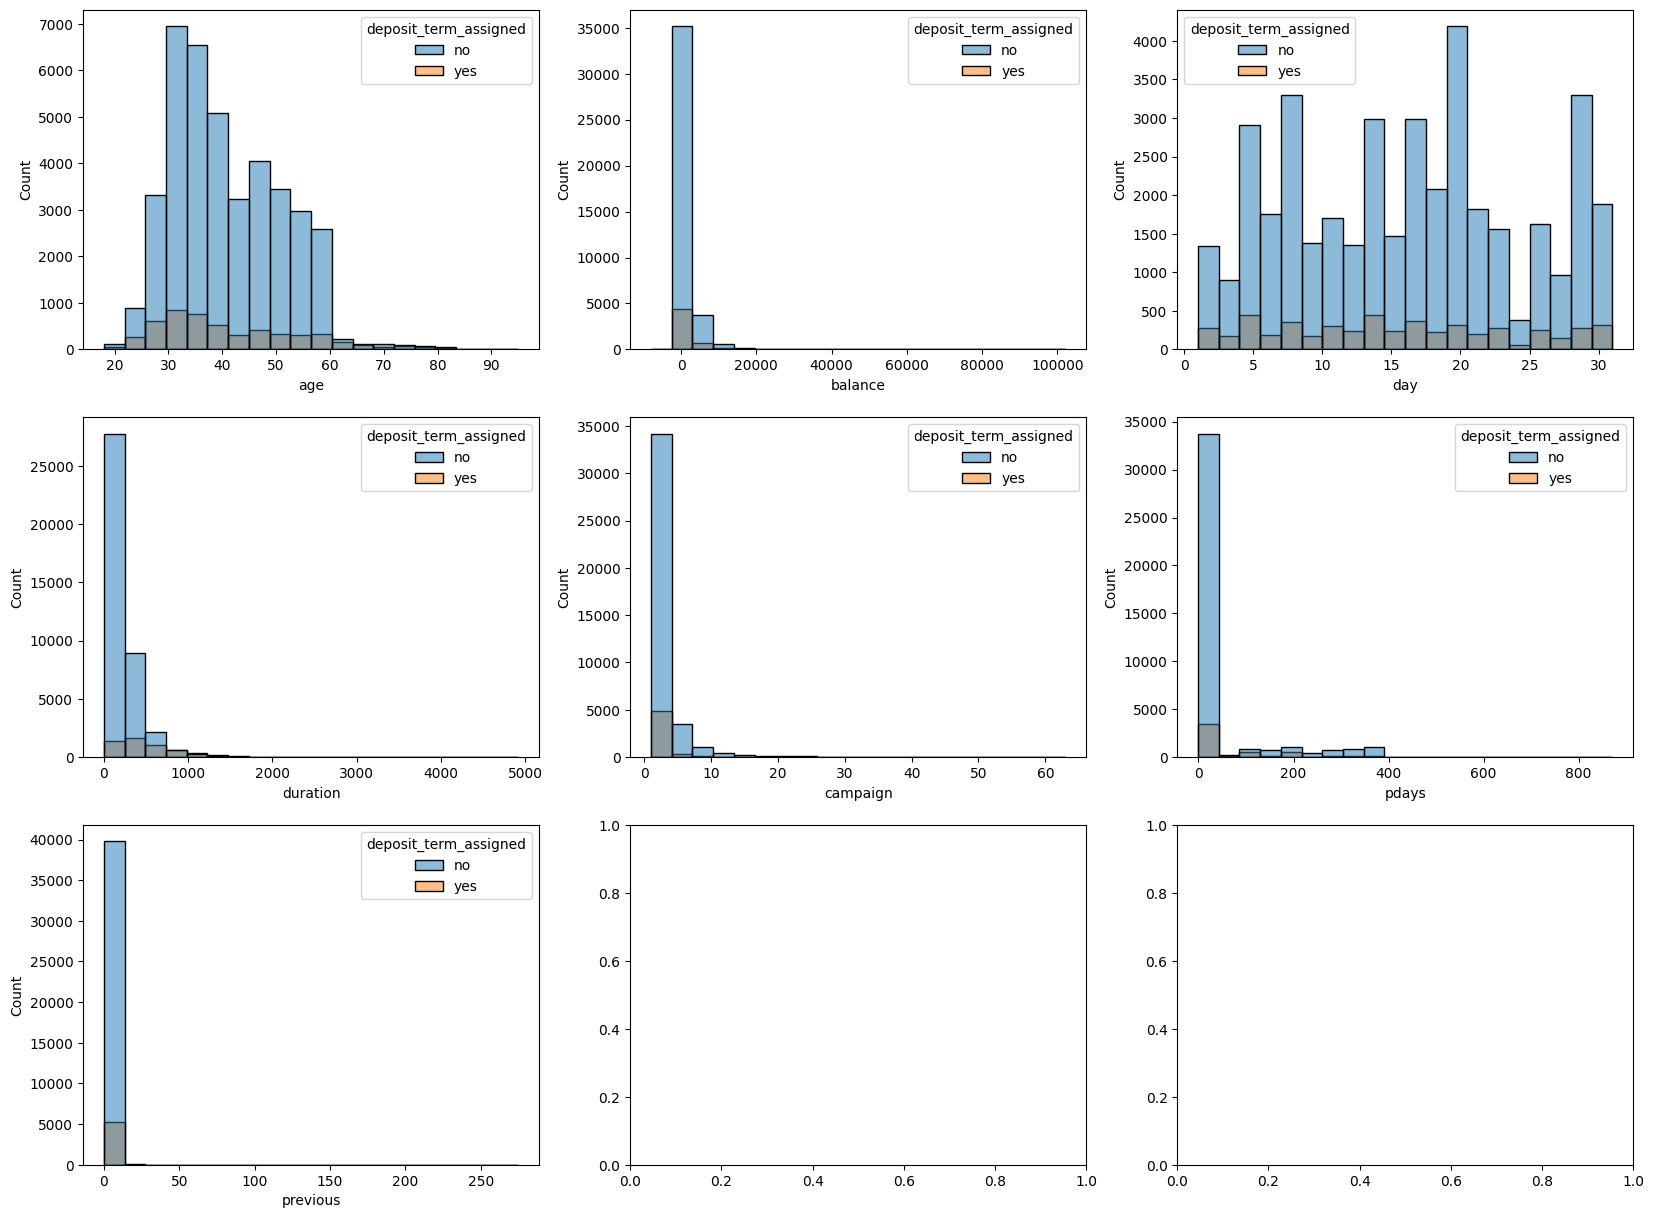

In [6]:
# Definindo a figura, tamanho e os quadrantes
fig, bxs = plt.subplots(3, 3, figsize=(20,15));

# Histograma entre idade e clientes que assinaram o termo
sbn.histplot(data=df2, x='age', hue='deposit_term_assigned', ax=bxs[0][0], bins=20);

# Histograma entre saldo médio e clientes que assinaram o termo
sbn.histplot(data=df2, x='balance', hue='deposit_term_assigned', ax=bxs[0][1], bins=20);

# Histograma entre saldo médio e o dia de contato
sbn.histplot(data=df2, x='day', hue='deposit_term_assigned', ax=bxs[0][2], bins=20);

# Histograma entre duração e o aceitação do contrato
sbn.histplot(data=df2, x='duration', hue='deposit_term_assigned', ax=bxs[1][0], bins=20);

# Histograma entre duração e o aceitação do contrato
sbn.histplot(data=df2, x='campaign', hue='deposit_term_assigned', ax=bxs[1][1], bins=20);

# Histograma entre duração e o aceitação do contrato
sbn.histplot(data=df2, x='pdays', hue='deposit_term_assigned', ax=bxs[1][2], bins=20);

# Histograma entre duração e o aceitação do contrato
sbn.histplot(data=df2, x='previous', hue='deposit_term_assigned', ax=bxs[2][0], bins=20);

**Relatório de Análise Geral**

**Job:** As profissões de management, technician, blue-collar e admin são as mais frequentes, o que é esperado, já que representam grande parte do mercado de trabalho. Observa-se que management, technician e admin têm maior propensão a aceitar o contrato, possivelmente por apresentarem maior poder aquisitivo e, em geral, maior conhecimento financeiro.

**Marital:** 
O status married se destaca tanto em volume quanto em taxa de aceitação. Isso é consistente, pois pessoas casadas tendem a apresentar maior estabilidade financeira e, em alguns casos, contam com renda familiar combinada. No caso de solteiros, a ausência de despesas familiares também pode aumentar a disponibilidade de recursos, o que pode favorecer a adesão.

**Education:** A distribuição é coerente, já que boa parte da população possui apenas ensino fundamental (primary) ou médio (secondary). Proporcionalmente, indivíduos com ensino superior (tertiary) apresentam maior propensão a depósitos, possivelmente pelo acesso a cargos mais qualificados e maior conhecimento financeiro. Já aqueles com menor escolaridade tendem a ter menor adesão, reflexo de menor renda média e menor acesso a conhecimento financeiro.

**Default:** A variável é clara: clientes inadimplentes dificilmente aderem ao contrato, pois não dispõem de recursos extras. Já os clientes adimplentes apresentam maior propensão, confirmando a consistência do dado.

**Housing:** Clientes com financiamento imobiliário possuem compromissos de longo prazo que reduzem sua disponibilidade financeira para depósitos. Ainda assim, clientes com maior organização ou renda podem aderir. Proporcionalmente, os sem financiamento demonstram maior aceitação.

**Loan:** O mesmo raciocínio vale para empréstimos pessoais. Em geral, são utilizados para quitação de dívidas ou consumo imediato, reduzindo a disponibilidade de recursos para depósitos.

**Contact:** Contatos via celular têm maior efetividade, já que normalmente permitem falar diretamente com o cliente. Por telefone fixo, há mais barreiras, como terceiros atendendo ou indisponibilidade. Isso explica a maior aceitação quando o contato é feito por celular.

**Month:** Observa-se maior adesão nos meses de maio a agosto. No entanto, não há informações suficientes para identificar o motivo. É necessário validar com as áreas de negócio se existem fatores sazonais ou campanhas específicas nesses períodos.

**Poutcome:** Clientes que já tiveram experiências positivas em ofertas anteriores tendem a aceitar novas, o que reforça a importância de um bom relacionamento e histórico de satisfação.

**Age:** A faixa entre 30 e 60 anos corresponde ao período de maior produtividade financeira, em que há busca por investimentos, depósitos e meios de pagamento. Por isso, essa faixa etária apresenta maior adesão.

**Balance:** A maioria dos clientes apresenta saldos médios baixos, o que é esperado, já que a base é composta, em grande parte, por blue-collar, admin, aposentados (retired), desempregados (unemployed), empregados domésticos (housemaid), estudantes (student) e autônomos (self-employed). Apenas uma minoria possui saldos médios elevados.

**Day:** Não se observa relação relevante entre o dia do contato e a adesão ao contrato. Portanto, essa variável não gera conclusões significativas.

**Duration:** O comportamento é esperado em telemarketing: muitas ligações são encerradas rapidamente (duração zero). Quando o cliente permanece ouvindo a proposta, a chance de conversão aumenta, o que é refletido no histograma.

**Campaign:** A cada nova tentativa de contato, a chance de aceitação diminui. Em geral, recusas iniciais reduzem a probabilidade de sucesso em ligações subsequentes. Assim, os dados são consistentes com o comportamento esperado.

**Pdays:** Intervalos moderados entre contatos podem favorecer a aceitação, já que permitem maturação da ideia. Porém, intervalos muito longos podem reduzir a eficácia, devido a mudanças no perfil ou nas condições do cliente.

**Previous:** Um histórico positivo de relacionamento com o banco reduz barreiras e aumenta a aceitação de novos produtos. Portanto, a variável se mostra coerente.

### 2.3 Variável Alvo

Verifiquemos a distribuição dos Dados

In [7]:
df2['deposit_term_assigned'].value_counts()/df2.shape[0]

deposit_term_assigned
no     0.883015
yes    0.116985
Name: count, dtype: float64

Podemos ver um bom desbalanceamento nos dados. Precisaremos tratar isso.

**Resumo Final:** Nossos dados mostram uma ótima consistência, o que permite que trabalhemos de forma segura. Seguimos para as nossas análises estatísticas e tratamentos.

## 2.4 Resumo Estatístico

**Variáveis Numéricas**

In [8]:
# Extraindo as variáveis numéricas
num_df2 = df2.select_dtypes(include=['int64', 'float64']).copy()

# Resumo Estatístico
num_df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


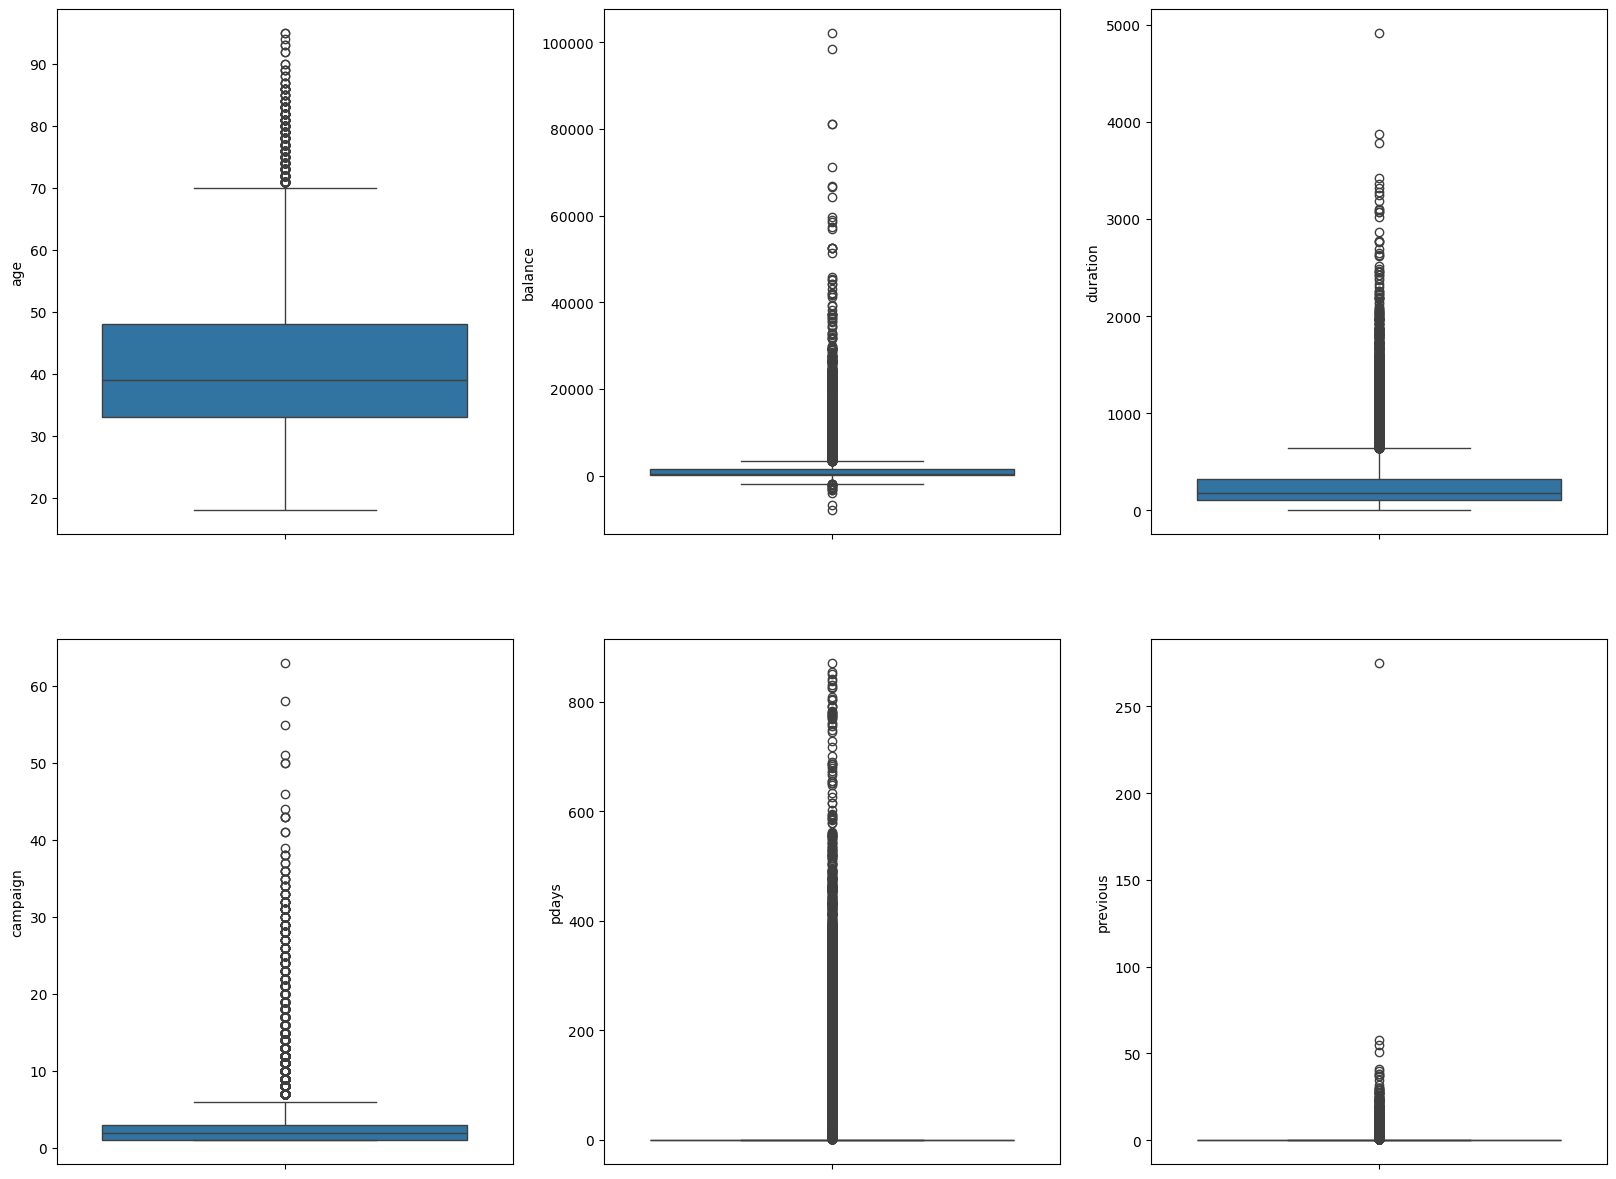

In [9]:
fig, cx = plt.subplots(2, 3, figsize=(20, 15))

sbn.boxplot(data=df2, y='age', ax=cx[0][0])
sbn.boxplot(data=df2, y='balance', ax=cx[0][1])
sbn.boxplot(data=df2, y='duration', ax=cx[0][2])
sbn.boxplot(data=df2, y='campaign', ax=cx[1][0])
sbn.boxplot(data=df2, y='pdays', ax=cx[1][1])
sbn.boxplot(data=df2, y='previous', ax=cx[1][2])

plt.show();

**Variáveis Categóricas**

In [10]:
# Extraindo as variáveis numéricas
cat_df2 = df2.select_dtypes(exclude=['int64', 'float64']).copy()

# Resumo Estatístico
cat_df2.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit_term_assigned
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


**Resumo da Estatística Descritiva**

O objetivo principal da estatística descritiva básico é entender como estão os nossos dados. Podemos ver que não há presença de dados nulos, o que já é algo bom. Entretanto, temos a presença de muitos outliers, mas eles não necessariamente são ruins, uma vez que eles são comportamentos esperados.

**age**: Nessa variável observamos a presença de ouliers e, além disso, vemos que o valor máximo é 95 anos. É totalemente possível existir alguém de 95 anos com uma conta em um banco, pois um aposentado precisa receber.

**balance**: O saldo médio em conta é algo que pode ser negativo, a pessoa utilizou o limite e, também, pode ter um bom valor, caso tenho um poder aquisitivo elevado, logo, um saldo médio de -8012 ou de 102000 é factível.

**duration**: Campanhas que duraram 4918 segundos, o que da 81 minutos, isto é, praticamente 1h e meia no telefone, não é algo atípico para a oferta de um produto e uma possível aceitação. Uma investigação será necessária nessa variável.

**campaign:** Aqui também temos um ponto de dúvida, 63 contatos em uma campanha? Precisamos investigar.

**pdays:** Esses outliers que vemos, são clientes que já estão a um bom tempo na base e, temos junto, clientes que são prospecções, isto é, a primeira vez que estão sendo contatados. Por isso essa quantidade de outliers.

Com essa quantidade de outliers, podemos observar um certo desafio para realizar a nossa análise. De antemão, já podemos ver que uma regressão logística, talvez, não entregue resultados concisos e confiáveis. Seguimos em nossa análise.

## 3.0 Tratamento dos Dados

In [11]:
df3 = df2.copy()

Nessa seção vamos realizar os tratamentos dos dados. Na seção anterior podemos observar a presença de certos outliers. Novamente, outliers, não necessariamente são anomalias, mas sim, um comportamento atípico, mas factível.

**Variável Duration**

In [61]:
# Ordenando os valores do maior para o menor para detalhamento
df3['duration'].sort_values(ascending=False)

# Calculando os interquartis
q1_duration = df3['duration'].quantile(0.25)
q3_duration = df3['duration'].quantile(0.75)

# Calculando o intervalo interquartil
intervalo_interquartil_duration = q3_duration - q1_duration

# Calculando
limite_superior_duration = q3_duration + 1.5*intervalo_interquartil_duration
limite_inferior_duration = q1_duration - 1.5*intervalo_interquartil_duration

# Obtendo os outliers
outliers_duration = df3['duration'][(df3['duration'] >= limite_superior_duration) | (df3['duration'] <= limite_inferior_duration)].sort_values(ascending=False)
print(f'Limite Superior: {limite_superior_duration}; Limite Inferior: {limite_inferior_duration}.')
print(f'Quantidade de Outliers: {len(outliers_duration)}; Percentual Representativo: {np.round( ( len( outliers_duration ) / df3.shape[0] )*100 )}%.')

# Amostra dos Dados
pd.DataFrame(outliers_duration.value_counts())

Limite Superior: 643.0; Limite Inferior: -221.0.
Quantidade de Outliers: 3247; Percentual Representativo: 7.0%.


,count
duration,
676,17
744,15
645,15
700,15
661,14
...,...
2062,1
2769,1
3785,1


**Variável Campaign**

In [60]:
# Ordenando os valores do maior para o menor para detalhamento
df3['campaign'].sort_values(ascending=False)

# Calculando os interquartis
q1_campaign = df3['campaign'].quantile(0.25)
q3_campaign = df3['campaign'].quantile(0.75)

# Calculando o intervalo interquartil
intervalo_interquartil_campaign = q3_campaign - q1_campaign

# Calculando
limite_superior_campaign = q3_campaign + 1.5*intervalo_interquartil_campaign
limite_inferior_campaign = q1_campaign - 1.5*intervalo_interquartil_campaign

# Obtendo os outliers
outliers_campaign = df3['campaign'][(df3['campaign'] >= limite_superior_campaign) | (df3['campaign'] <= limite_inferior_campaign)].sort_values(ascending=False)
print(f'Limite Superior: {limite_superior_campaign}; Limite Inferior: {limite_inferior_campaign}.')
print(f'Quantidade de Outliers: {len(outliers_campaign)}; Percentual Representativo: {np.round( ( len( outliers_campaign ) / df3.shape[0] )*100 )}%')

# Dados
pd.DataFrame(outliers_campaign.value_counts())

Limite Superior: 6.0; Limite Inferior: -2.0.
Quantidade de Outliers: 4355; Percentual Representativo: 10.0%


,count
campaign,
6,1291
7,735
8,540
9,327
10,266
11,201
12,155
13,133
14,93


**Variável Age**

In [59]:
# Calculando os interquartis
q1_age = df3['age'].quantile(0.25)
q3_age = df3['age'].quantile(0.75)

# Calculando o intervalo interquartil
intervalo_interquartil_age = q3_age - q1_age

# Calculando
limite_superior_age = q3_age + 1.5*intervalo_interquartil_age
limite_inferior_age = q1_age - 1.5*intervalo_interquartil_age

# Obtendo os outliers
outliers_age = df3['age'][(df3['age'] >= limite_superior_age) | (df3['age'] <= limite_inferior_age)].sort_values(ascending=False)
print(f'Limite Superior: {limite_superior_age}; Limite Inferior: {limite_inferior_age}.')
print(f'Quantidade de Outliers: {len(outliers_age)}; Percentual Representativo: {np.round( ( len( outliers_age) / df3.shape[0] )*100 )}%')

# Mostrando os dados
pd.DataFrame(outliers_age.value_counts())

Limite Superior: 70.5; Limite Inferior: 10.5.
Quantidade de Outliers: 487; Percentual Representativo: 1.0%


,count
age,
71,54
72,52
77,44
73,44
75,39
74,37
76,32
80,31
78,30


**Variável Balance**

In [62]:
# Calculando os interquartis
q1_balance = df3['balance'].quantile(0.25)
q3_balance = df3['balance'].quantile(0.75)

# Calculando o intervalo interquartil
intervalo_interquartil_balance = q3_balance - q1_balance

# Calculando
limite_superior_balance = q3_balance + 1.5*intervalo_interquartil_balance
limite_inferior_balance = q1_balance - 1.5*intervalo_interquartil_balance

# Obtendo os outliers
outliers_balance = df3['balance'][(df3['balance'] >= limite_superior_balance) | (df3['balance'] <= limite_inferior_balance)].sort_values(ascending=False)
print(f'Limite Superior: {limite_superior_balance}; Limite Inferior: {limite_inferior_balance}.')
print(f'Quantidade de Outliers: {len(outliers_balance)}; Percentual Representativo: {np.round( ( len( outliers_balance) / df3.shape[0] )*100 )}%')

# Mostrando os dados
pd.DataFrame(outliers_balance.value_counts())

Limite Superior: 3462.0; Limite Inferior: -1962.0.
Quantidade de Outliers: 4731; Percentual Representativo: 10.0%


,count
balance,
8304,11
6138,10
3696,7
4401,7
3689,6
...,...
3467,1
3468,1
3470,1


**Variável pdays**

In [64]:
# Calculando os interquartis
q1_pdays = df3['pdays'].quantile(0.25)
q3_pdays = df3['pdays'].quantile(0.75)

# Calculando o intervalo interquartil
intervalo_interquartil_pdays = q3_pdays - q1_pdays

# Calculando
limite_superior_pdays = q3_pdays + 1.5*intervalo_interquartil_pdays
limite_inferior_pdays = q1_pdays - 1.5*intervalo_interquartil_pdays

# Obtendo os outliers
outliers_pdays = df3['pdays'][(df3['pdays'] >= limite_superior_pdays) | (df3['pdays'] <= limite_inferior_pdays)].sort_values(ascending=False)
print(f'Limite Superior: {limite_superior_pdays}; Limite Inferior: {limite_inferior_pdays}.')
print(f'Quantidade de Outliers: {len(outliers_pdays)}; Percentual Representativo: {np.round( ( len( outliers_pdays ) / df3.shape[0] )*100 )}%')

# Mostrando os dados
pd.DataFrame(outliers_pdays.value_counts())

Limite Superior: -1.0; Limite Inferior: -1.0.
Quantidade de Outliers: 45211; Percentual Representativo: 100.0%


,count
pdays,
-1,36954
182,167
92,147
183,126
91,126
...,...
842,1
3,1
850,1


**Variável Previous**

In [65]:
# Calculando os interquartis
q1_previous = df3['previous'].quantile(0.25)
q3_previous = df3['previous'].quantile(0.75)

# Calculando o intervalo interquartil
intervalo_interquartil_previous = q3_previous - q1_previous

# Calculando
limite_superior_previous = q3_previous + 1.5*intervalo_interquartil_previous
limite_inferior_previous = q1_previous - 1.5*intervalo_interquartil_previous

# Obtendo os outliers
outliers_previous = df3['previous'][(df3['previous'] >= limite_superior_previous) | (df3['previous'] <= limite_inferior_previous)].sort_values(ascending=False)
print(f'Limite Superior: {limite_superior_previous}; Limite Inferior: {limite_inferior_previous}.')
print(f'Quantidade de Outliers: {len(outliers_previous)}; Percentual Representativo: {np.round( ( len( outliers_previous ) / df3.shape[0] )*100 )}%')

# Mostrando os dados
pd.DataFrame(outliers_previous.value_counts())

Limite Superior: 0.0; Limite Inferior: 0.0.
Quantidade de Outliers: 45211; Percentual Representativo: 100.0%


,count
previous,
0,36954
1,2772
2,2106
3,1142
4,714
5,459
6,277
7,205
8,129


**Tratativas a serem realizadas**


* Duration: Relembrando o contexto do nosso dataset, lembremos que ele está em meados de 2010. Ligações longas acabavam sendo comuns para a resolução problemas complexos. Logo, manteremos essa variável.

* Campaign: Observemos aqui que, não estamos apenas falando sobre contatos para falar sobre o produto, mas também, para além disso. Logo, isso pode ser um indicativo de relacionamento. Manteremos a variável nessa natureza.

* Age: Vamos parar um pouco e, entender o nosso objetivo. Queremos clientes que assinem um contrato de depósito á prazo e, permaneça conosco por um longo tempo. Nossos outliers aqui, são os clientes com mais de 71 anos e, além disso, a expectativa de um português é de, em média 76 anos. Logo, vamos tratá-los.

* Balance: Saldo médio elevado em uma conta é natural. Logo, remover esses outliers pode ser uma perca de informação desnecessária. Vamos manter.

* Variável pdays: Essa é uma variável, ao qual, não vamos alterar. Ela tem o objetivo de nos dizer se um cliente é novo ou não.

* Variável previous: Essa é uma variável que também não vamos alterar. Ela possui um peso sobre relacionamento com o cliente.

Vemos aqui, um grande impasse. Não podemos eliminar esses outliers. Para isso, existem muitas técnicas. Temos, por exemplo, 

- Transformação de valores por meio de funções matemáticas bijetoras.(Log, Raiz, Exponencial).
- Utilização de faixa de valores com técnicas estatísticas. 

Vendo que não temos a necessidade de tratamento de nenhum dado nulo e que, também, para outliers, não será necessário nenhum tratamento, mas sim, uma alteração de escala, seguiremos para a engenharia de atributos.

## 4.0 Engenharia de Atributos

In [67]:
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit_term_assigned
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
